In [82]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


# 명시적 대기
from selenium.webdriver.support.ui import WebDriverWait # 웹드라이버
from selenium.webdriver.support import expected_conditions as EC # 특정한 상태를 기다리는 라이브러리
from selenium.common.exceptions import ElementNotInteractableException

from scipy import stats
# 통계모델들...
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [83]:
# windows 용 한글 폰트 오류 해결
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

# 내 강아지에게 먹일 최고의 사료는~~~~?
## 기준 (성분관련)
- 조단백이 20퍼가 넘김(논문 뒷받침)
- 조지방이 6퍼 넘김
## 시각화
- 타입별 구성성분 분석표(비교 시각화 파트)
- 브랜드 별 구성성분 분석표(비교 시각화 파트)
- 산점도 : x축 조단백 y 축 %센또 , hue brand

In [204]:
pet_selected_df = pd.read_excel("mini_project_data.xlsx")

In [206]:
# 그람당 가격 구하기
arr = []
for gram in pet_selected_df["무게"]:
    try :
        if "kg" in gram:
            arr.append(float(gram.split("kg")[0]))
        elif "g" in gram:
            arr.append(float(gram.split("g")[0]) / 1000)
        else :
            arr.append(None)
    except :
        arr.append(None)
        
pet_selected_df["무게_환산"] = arr

In [207]:
try:
    pet_selected_df["가격대비무게"] = pet_selected_df["가격"] / pet_selected_df["무게_환산"]
except:
    pet_selected_df["가격대비무게"] = 0

In [208]:
pet_selected_df.head(3)

,브랜드,상품이름,가격,연령,타입,별점,리뷰개수,주원료,조단백,조지방,조섬유,조회분,칼슘,인,수분,무게,무게_환산,가격대비무게
0,로얄캐닌,미니 인도어 어덜트 8.7kg,85080,어덜트,건식,4.7,0,"과일,야채",19.0,12.0,2.8,7.4,0.76,0.56,10.5,8.7kg,8.70,9779.310345
1,나우,그레인프리 스몰브리드 어덜트 9.98kg,101590,어덜트,건식,4.8,0,"연어, 칠면조, 오리",27.0,13.0,4.5,7.5,1.20,0.70,10.0,9.98kg,9.98,10179.358717
2,나우,그레인프리 스몰브리드 시니어 9.98kg,99810,시니어,건식,4.8,0,"과일,야채, 칠면조, 오리, 연어",24.0,10.0,6.0,7.0,0.60,0.40,10.0,9.98kg,9.98,10001.002004


In [209]:
pet_selected_df.dtypes

브랜드        object
상품이름       object
가격          int64
연령         object
타입         object
별점        float64
리뷰개수        int64
주원료        object
조단백       float64
조지방       float64
조섬유       float64
조회분       float64
칼슘        float64
인         float64
수분        float64
무게         object
무게_환산     float64
가격대비무게    float64
dtype: object

In [210]:
pet_selected_df["연령"].unique()

array(['어덜트', '시니어', '주니어', '전연령', nan, '퍼피'], dtype=object)

In [211]:
# 가격과 조단백의 상관관계~

In [220]:
pet_selected_df["타입"].unique()

array(['건식', '습식', '소프트(반건조)', '동결건조', nan, '반건조(소프트건식)', '화식', '습식간식',
       '트릿·동결건조'], dtype=object)

In [223]:
pet_selected_df = pet_selected_df[pet_selected_df["타입"].isin(["소프트(반건조)","건식","반건조"])]

In [224]:
related = pet_selected_df[["브랜드","상품이름","가격","타입","조단백","조지방","조섬유","조회분","칼슘","인","수분","가격대비무게"]]

In [225]:
related.head()

,브랜드,상품이름,가격,타입,조단백,조지방,조섬유,조회분,칼슘,인,수분,가격대비무게
0,로얄캐닌,미니 인도어 어덜트 8.7kg,85080,건식,19.0,12.0,2.8,7.4,0.760,0.560,10.5,9779.310345
1,나우,그레인프리 스몰브리드 어덜트 9.98kg,101590,건식,27.0,13.0,4.5,7.5,1.200,0.700,10.0,10179.358717
2,나우,그레인프리 스몰브리드 시니어 9.98kg,99810,건식,24.0,10.0,6.0,7.0,0.600,0.400,10.0,10001.002004
3,로얄캐닌,독 하이포알러제닉 스몰독 3.5kg,73000,건식,22.0,14.0,1.7,9.5,0.648,0.488,10.5,20857.142857
4,도그라인,아지피아 20kg,39240,건식,32.0,20.0,3.0,13.0,1.000,0.800,14.0,1962.000000


In [226]:
# 브랜드로 묶어서 mean 을 구하기
type_group = related.groupby("타입")[["조단백","조지방","조섬유","조회분","칼슘","인","수분"]].mean()

In [227]:
type_group = brand_group.sort_values("타입")

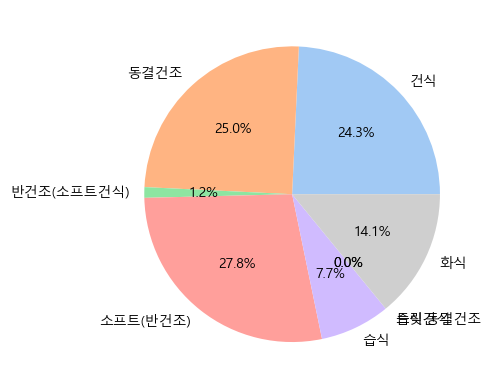

In [228]:
# 성분 평균 파이차트
colors = sns.color_palette('pastel')[0:10]
labels = brand_group.index
plt.pie(brand_group["조단백"],labels=labels,colors = colors, autopct='%.1f%%')
plt.show()

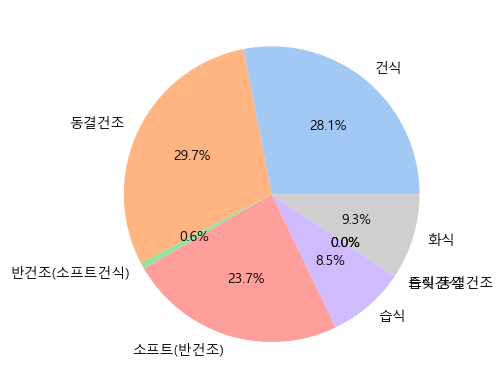

In [229]:
colors = sns.color_palette('pastel')[0:10]
labels = brand_group.index
plt.pie(brand_group["조지방"],labels=labels,colors = colors, autopct='%.1f%%')
plt.show()

- 반건조, 동결건조, 건식 순으로 조단백 함유량이 많음

In [230]:
chart_data_selected["가격대비무게"] = chart_data_selected["가격대비무게"].fillna(0)

In [231]:
chart_data_selected[chart_data_selected["가격대비무게"].isna()]

,브랜드,가격,조단백,조지방,조섬유,조회분,칼슘,인,수분,가격대비무게


In [232]:
print("조단백 : ", stats.ttest_rel(chart_data_selected["가격대비무게"],chart_data_selected["조단백"]).pvalue)
print("조지방 : ", stats.ttest_rel(chart_data_selected["가격대비무게"],chart_data_selected["조지방"]).pvalue)
print("조회분 : ", stats.ttest_rel(chart_data_selected["가격대비무게"],chart_data_selected["조회분"]).pvalue)
print("칼슘 : ", stats.ttest_rel(chart_data_selected["가격대비무게"],chart_data_selected["칼슘"]).pvalue)
print("인 : ", stats.ttest_rel(chart_data_selected["가격대비무게"],chart_data_selected["인"]).pvalue)
print("수분 : ", stats.ttest_rel(chart_data_selected["가격대비무게"],chart_data_selected["수분"]).pvalue)

조단백 :  0.0013947169180025163
조지방 :  0.0013808628716438817
조회분 :  0.0013741450908437175
칼슘 :  0.0013675977773516573
인 :  0.001367333155210701
수분 :  0.0013663975778568766


In [233]:
print("수분과조단백씨 : ", stats.ttest_rel(chart_data_selected["수분"],chart_data_selected["조단백"]).pvalue)

수분과조단백씨 :  0.45749223420158125


- 귀무가설 : 가격과 조단백 퍼센트는 상관관계가 없다.
- 대립가설 : 가격과 조단백 퍼센트는 상관관계가 있다.
- p_value : 0.05 미만이므로 가격과 조단백 퍼센트는 상관관계가 있다!!!!
- **원료가 많이 들어가 있을수록 가격이 올라가는 추세이다~~**

In [234]:
# 조단백 / 가격 / hue 회사명
protein_max = pet_selected_df["조단백"].max()
protein_mean = pet_selected_df["조단백"].mean()

price_max = pet_selected_df["가격"].max()
price_mean = pet_selected_df["가격"].mean()

fat_max = pet_selected_df["조지방"].max()
fat_mean = pet_selected_df["조지방"].mean()

print("protein_max : " , protein_max)
print("protein_mean : " , protein_mean)
print("-----------------")
print("price_max : " , price_max)
print("price_mean : " , price_mean)
print("-----------------")
print("fat_max : " , fat_max)
print("fat_mean : " , fat_mean)

protein_max :  42.0
protein_mean :  20.184314049586774
-----------------
price_max :  451500
price_mean :  49496.395041322314
-----------------
fat_max :  30.0
fat_mean :  10.198446280991735


In [235]:
#pet_selected_df.head()

In [240]:
chart_data_selected = related.head(10).sort_values("가격")

In [241]:
chart_data_selected

,브랜드,상품이름,가격,타입,조단백,조지방,조섬유,조회분,칼슘,인,수분,가격대비무게
10,뉴트리나,어덜트 연어 2.1kg,8290,건식,24.0,10.0,5.0,10.0,1.000,0.600,12.0,3947.619048
7,도그랑,클래식 5kg,9090,건식,25.0,10.0,0.0,0.0,0.000,0.000,0.0,1818.000000
4,도그라인,아지피아 20kg,39240,건식,32.0,20.0,3.0,13.0,1.000,0.800,14.0,1962.000000
8,로얄캐닌,엑스스몰 어덜트 3kg,40580,건식,24.0,18.0,0.0,0.0,0.000,0.000,0.0,13526.666667
9,뉴트리나,건강백서 건강한 6세이상 10.2kg,50380,건식,27.0,12.0,5.0,10.0,1.000,0.600,12.0,4939.215686
5,이즈칸,독 퍼포먼스 어덜트 15kg,66900,건식,26.0,16.0,3.0,9.0,1.300,0.900,12.0,4460.000000
3,로얄캐닌,독 하이포알러제닉 스몰독 3.5kg,73000,건식,22.0,14.0,1.7,9.5,0.648,0.488,10.5,20857.142857
0,로얄캐닌,미니 인도어 어덜트 8.7kg,85080,건식,19.0,12.0,2.8,7.4,0.760,0.560,10.5,9779.310345
2,나우,그레인프리 스몰브리드 시니어 9.98kg,99810,건식,24.0,10.0,6.0,7.0,0.600,0.400,10.0,10001.002004
1,나우,그레인프리 스몰브리드 어덜트 9.98kg,101590,건식,27.0,13.0,4.5,7.5,1.200,0.700,10.0,10179.358717


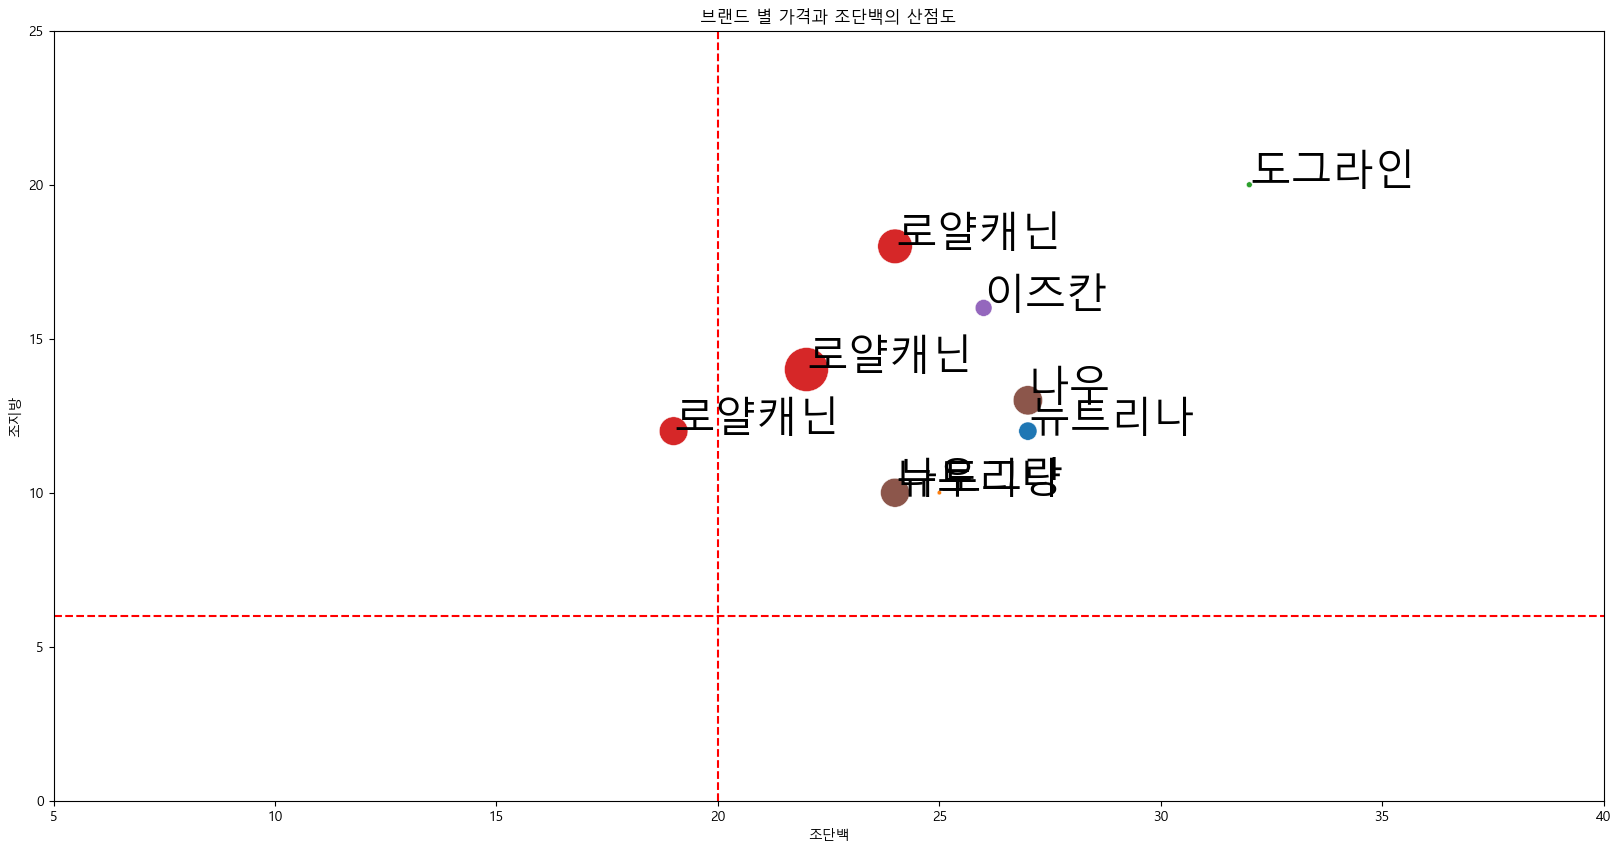

In [242]:
plt.figure(figsize = (20,10))
plt.title("브랜드 별 가격과 조단백의 산점도")
sns.scatterplot(
    x = "조단백",
    y = "조지방",
    size = "가격대비무게",
    hue = chart_data_selected["브랜드"],
    data = chart_data_selected,
    sizes = (10, 1000), # 크기의 범위
    legend = False
)
# 조단백 20 이상 
# 조지방 6 이상 

# 절취선 
plt.plot(
    [20, 20],
    [0,fat_max], 
    "r--"
)

plt.plot(
    [0, protein_max],
    [6,6], 
    "r--"
)
plt.xlim(5,40)
plt.ylim(0,25)

for idx, row in chart_data_selected.iterrows():
    x = row["조단백"]
    y = row["조지방"]
    z = row["브랜드"].split()[0]

    plt.text(x, y, z, size = 30)
    
plt.show()

- 가성비 브랜드로는 도그라인이 가장 좋은 브랜드이다. 
- 